## Data from EQ-evolution

In [1]:
%matplotlib inline

from math import *
import matplotlib
import numpy as np
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pylab
from scipy import interpolate
import os
text_size=26
fig_size_x=24
fig_size_y=14
import seaborn as sns
Colors = sns.color_palette("colorblind", 16).as_hex()



# Gauge transformation study

## CLASS k-essence Newtonian vs Synchronous

In [2]:
redshifts=[1000, 500,100,50,10,3,1,0];
pk_new=[];
pk_sync=[];
tk_new=[];
tk_sync=[];

for i in range(np.shape(redshifts)[0]):
    pk_new.append(np.loadtxt("./../../EQ_hi_class/output/class_new_z"+str(i+1)+"_pk.dat"));
    pk_sync.append(np.loadtxt("./../../EQ_hi_class/output/class_sync_z"+str(i+1)+"_pk.dat"))

    tk_new.append(np.loadtxt("./../../EQ_hi_class/output/class_new_z"+str(i+1)+"_tk.dat"));
    tk_sync.append(np.loadtxt("./../../EQ_hi_class/output/class_sync_z"+str(i+1)+"_tk.dat"));

bg= np.loadtxt("./../../EQ_hi_class/output/class_sync_background.dat")
Hconf_hiclass = interpolate.interp1d(1./(1.+bg[:,0]) ,bg[:,3])
#     newt_tk = 

## Power spectrum

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


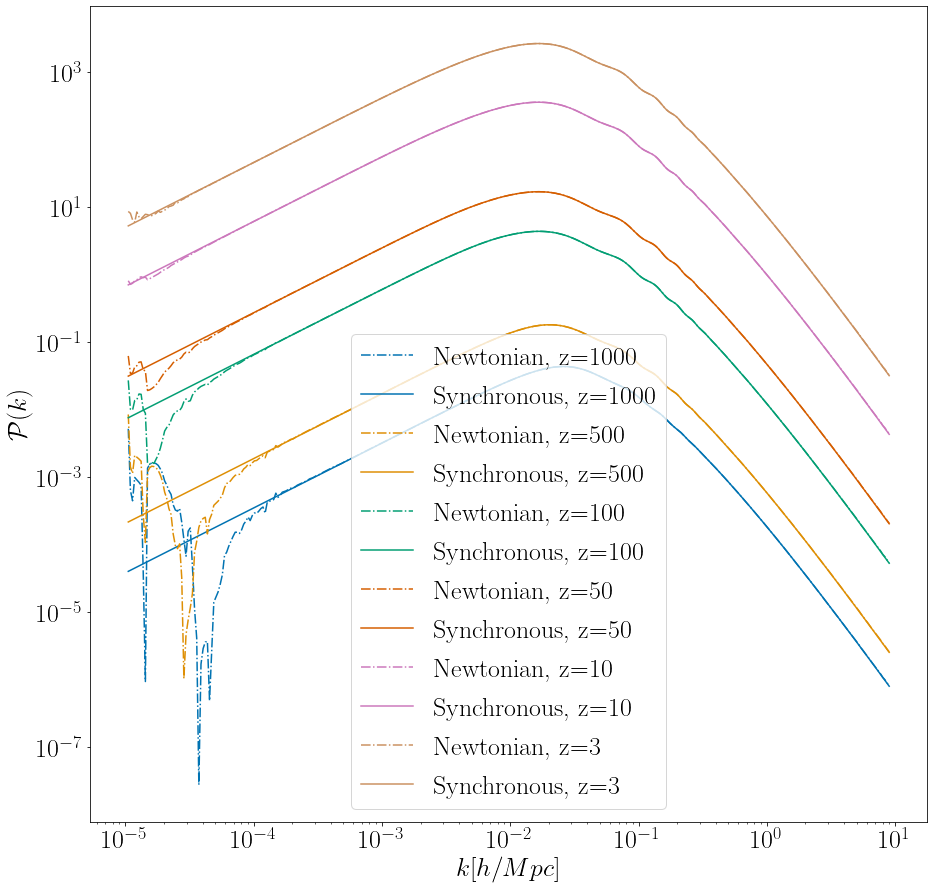

In [3]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,15))

l=0
for i in range(0,6):
    
    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;

    z= redshifts[i];
    plt.plot(pk_new[i][:,0], pk_new[i][:,1],"-.", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(pk_sync[i][:,0], pk_sync[i][:,1],"-",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$\mathcal{P}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
plt.yscale('log')
# plt.xlim(1.e-5,1.e0)
# plt.ylim(1.e-14,1.e-8)

## Transfer functions

### d_cdm

(-5, 4.0)

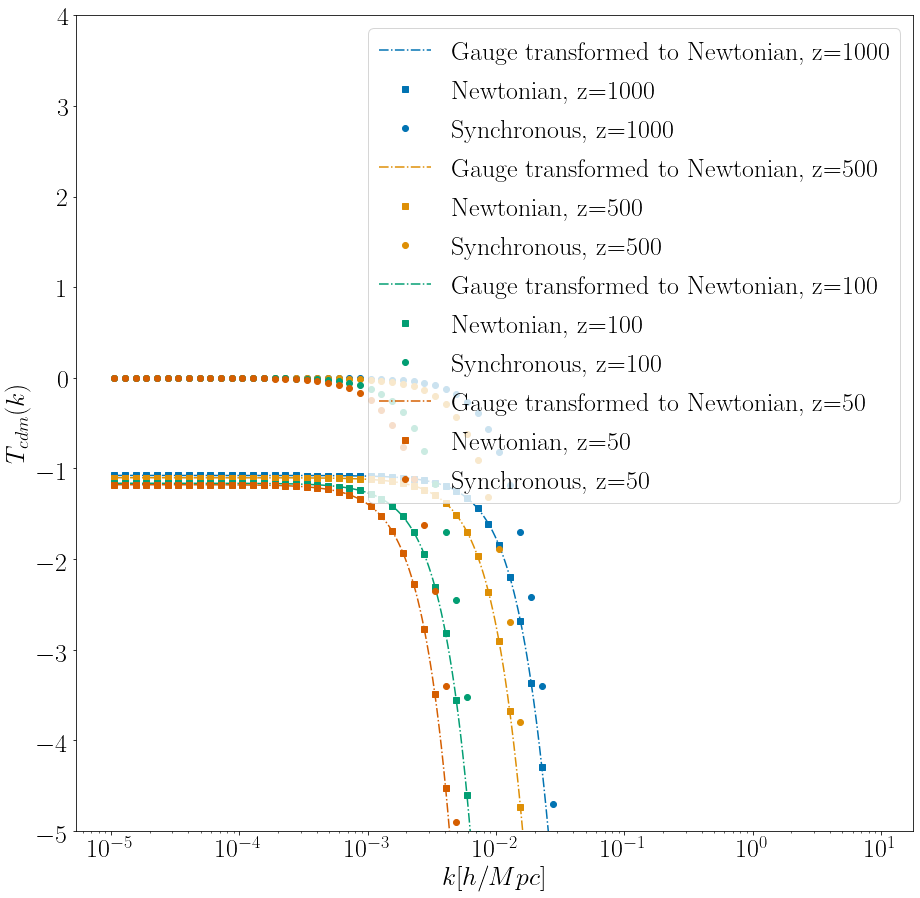

In [5]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2=1.e-4;
c=2.99792458*1.e5; #Km/s
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373

plt.figure(figsize=(15,15))

l=0
Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * 1./(1.+bg[:,0])  )
rho_cdm_prime = interpolate.interp1d(bg[:,0] ,bg[:,3] * 1./(1.+bg[:,0])  )
rho_cdm = interpolate.interp1d(bg[:,0] ,bg[:,3] * 1./(1.+bg[:,0])  )

for i in range(0,4):
    
    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
#     tk_newt = tk_sync[i][:,3]-3.0 * alpha * ()
    z= redshifts[i];

    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,3]-alpha/h/h * 3. * Hconf_hiclass(z)),"-.",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))
    plt.plot(tk_new[i][::5,0], (tk_new[i][::5,3]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::5,0], (tk_sync[i][::5,3]),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{cdm}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-2)
plt.ylim(-5,4.0)

In [8]:
Hconf_hiclass(0)


array(0.00022534)

In [9]:
100*h/c

0.00022534256015206366

### d_b

(-5, 5.0)

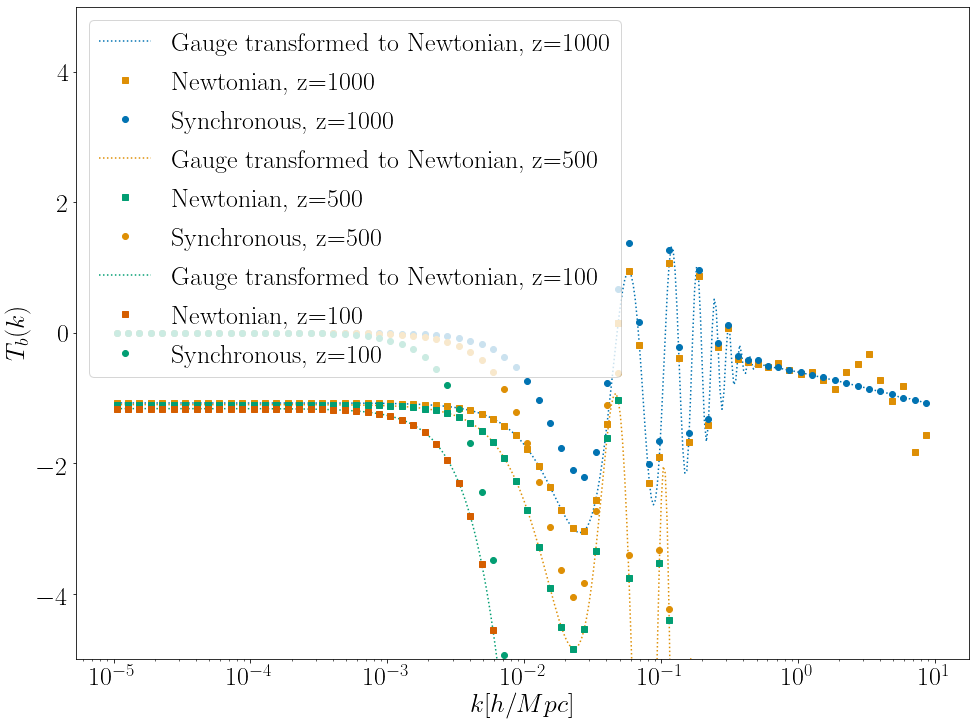

In [135]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(16,12))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,2]-alpha/h/h * 3. * Hconf_hiclass(z)),":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::5,0], (tk_new[i][::5,2]),"s", color = Colors[l+1] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::5,0], (tk_sync[i][::5,2]),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{b}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-2)
plt.ylim(-5,5.0)



### d_g

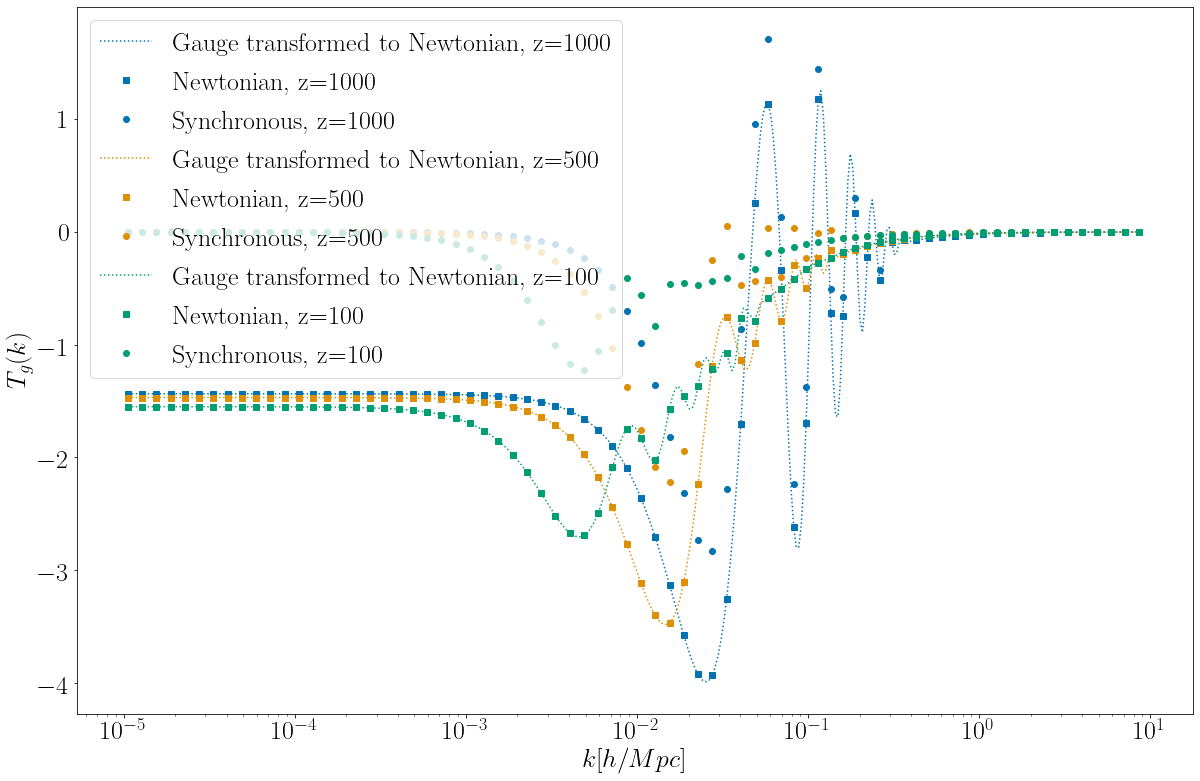

In [141]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(20,13))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,1]-alpha/h/h * 4. * Hconf_hiclass(z)),":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::5,0], (tk_new[i][::5,1]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::5,0], (tk_sync[i][::5,1]),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{g}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-2)
# plt.ylim(1.,10.0)

### d_fld

(-3, 0.5)

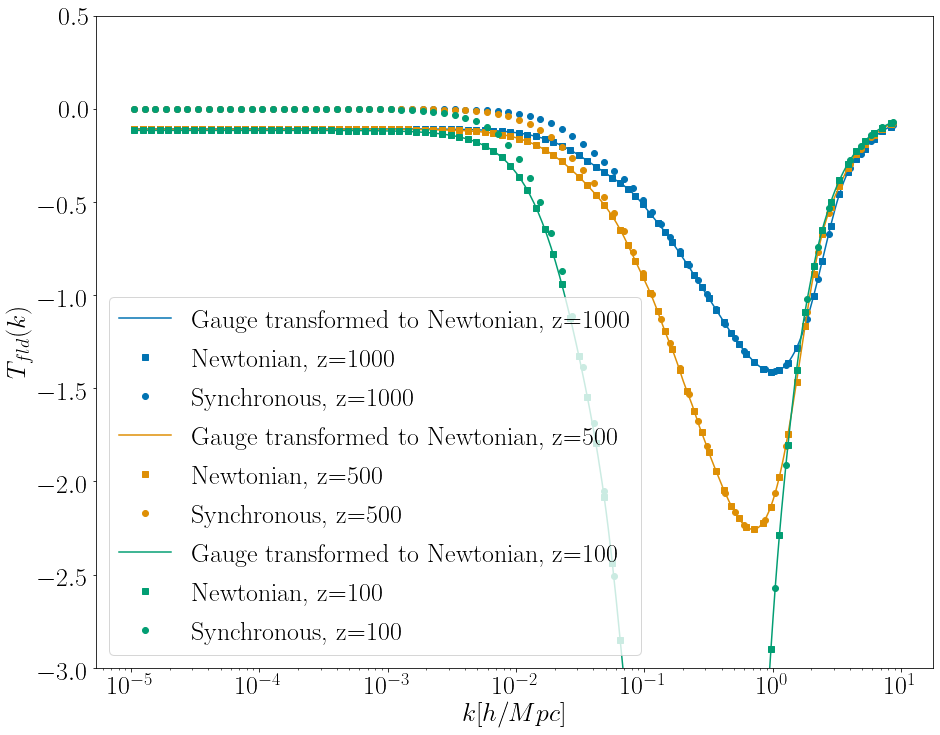

In [146]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,12))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    w=-0.9
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,4]-alpha/h/h * 3. * (1+w) * Hconf_hiclass(z)),"-",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::4,0], (tk_new[i][::4,4]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::5,0], (tk_sync[i][::5,4]),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{fld}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
plt.ylim(-3,0.5)

### d_ur

(-3, 1)

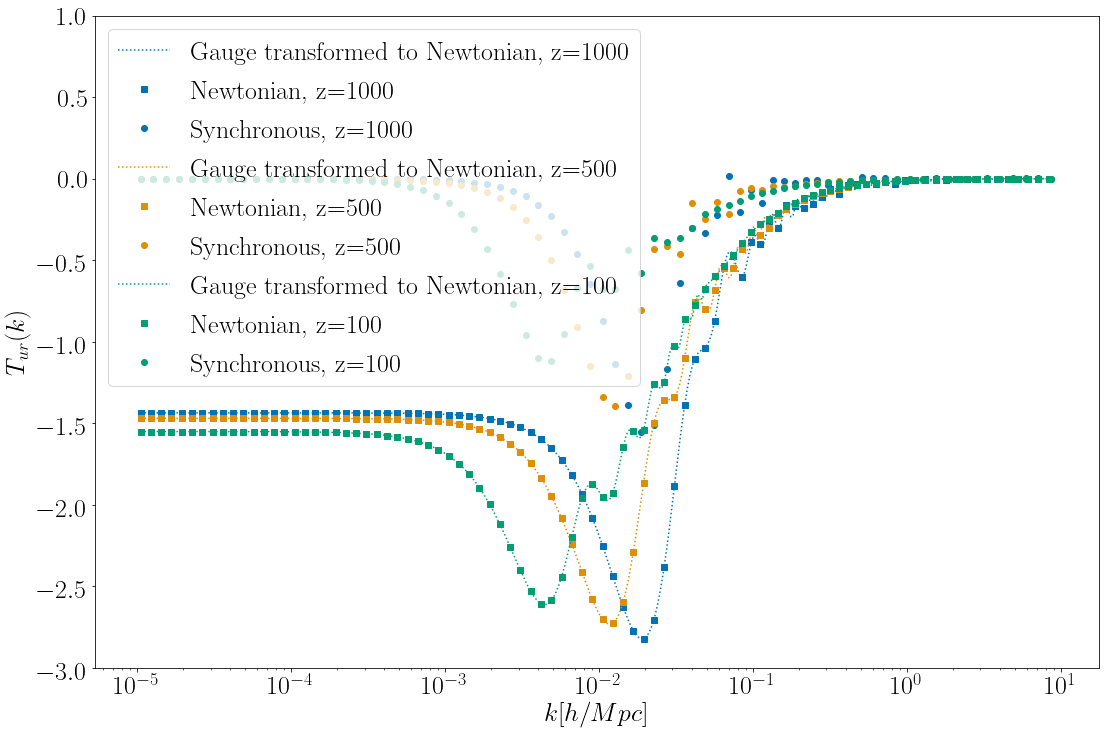

In [151]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(18,12))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    w=1/3
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,5]-alpha/h/h * 3. * (1+w) * Hconf_hiclass(z)),":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::4,0], (tk_new[i][::4,5]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::5,0], (tk_sync[i][::5,5]),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{ur}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
plt.ylim(-3,1)

### d_tot

(-15, 0.5)

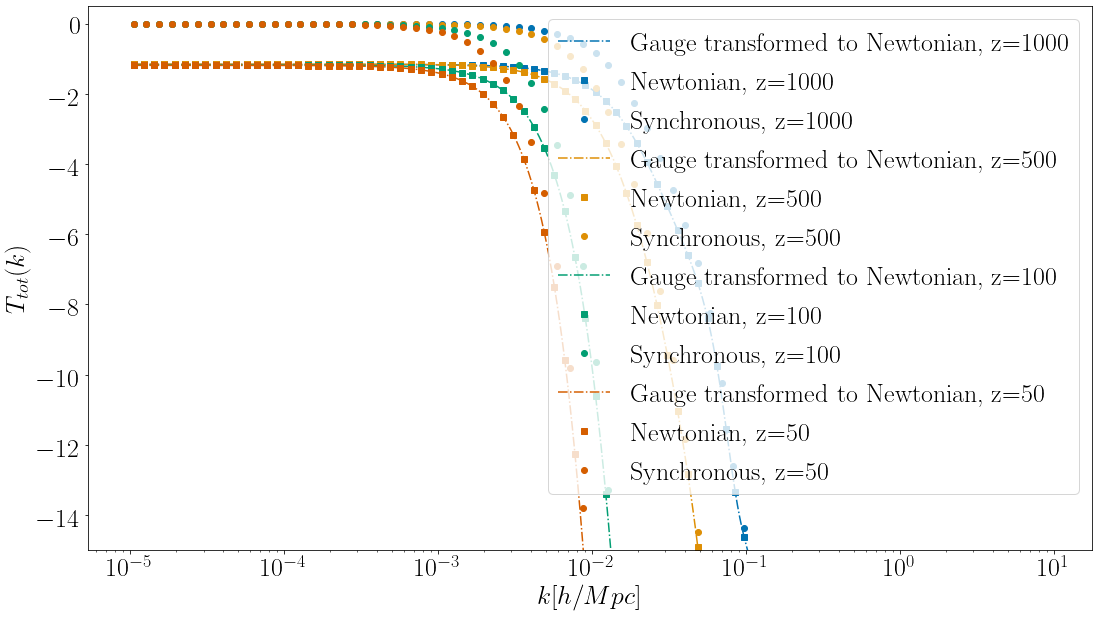

In [156]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(18,10))
Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * 1./(1.+bg[:,0])  )
rho_fld = interpolate.interp1d(bg[:,0] ,bg[:,12])
rho_cdm = interpolate.interp1d(bg[:,0] ,bg[:,11])
rho_b = interpolate.interp1d(bg[:,0] ,bg[:,10])
rho_rad = interpolate.interp1d(bg[:,0] ,bg[:,14])
rho_g = interpolate.interp1d(bg[:,0] ,bg[:,9])
rho_tot = interpolate.interp1d(bg[:,0] ,bg[:,16])
w_fld = interpolate.interp1d(bg[:,0] ,bg[:,13])

l=0
for i in range(0,4):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    matter = ((rho_b(z)+rho_cdm(z))*(1+w *0))/rho_tot(z)
    rad = ((rho_rad(z)+rho_g(z))*(1+1/3.))/rho_tot(z)
    fld = (rho_fld(z)*(1+w_fld(z)))/rho_tot(z)

#     w=1/3
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,6]-alpha/h/h * 3. * (matter + rad +fld ) * Hconf_hiclass(z)),"-.",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::4,0], (tk_new[i][::4,6]),"s", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::5,0], (tk_sync[i][::5,6]),"o",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{tot}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
plt.ylim(-15,0.5)



##################
# i=0
# z= redshifts[i];
# k= tk_sync[i][:,0]
# h_prime=tk_sync[i][:,10]
# eta_prime = tk_sync[i][:,12]
# psi = tk_sync[i][:,8]
# phi = tk_sync[i][:,7]
# eta = tk_sync[i][:,11]
# alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
# alpha_prime = psi + phi - eta;
# psi_int = interpolate.interp1d(k ,psi)
# phi_int = interpolate.interp1d(k , phi)
# eta_int = interpolate.interp1d(k , eta)
# alpha_int = interpolate.interp1d(k , alpha)
# alpha_prime_int = interpolate.interp1d(k , alpha_prime)
# delta_tot_t = interpolate.interp1d(k , tk_sync[i][:,6]) 
# matter = ((rho_b(z)+rho_cdm(z))*(1+w *0))/rho_tot(z)
# rad = ((rho_rad(z)+rho_g(z))*(1+1/3.))/rho_tot(z)
# fld = (rho_fld(z)*(1+w_fld(z)))/rho_tot(z)
# ### Check if the values make sense:
# k_p=0.001;
# print("z: ",z, "k: ",k_p," ")



### t_cdm

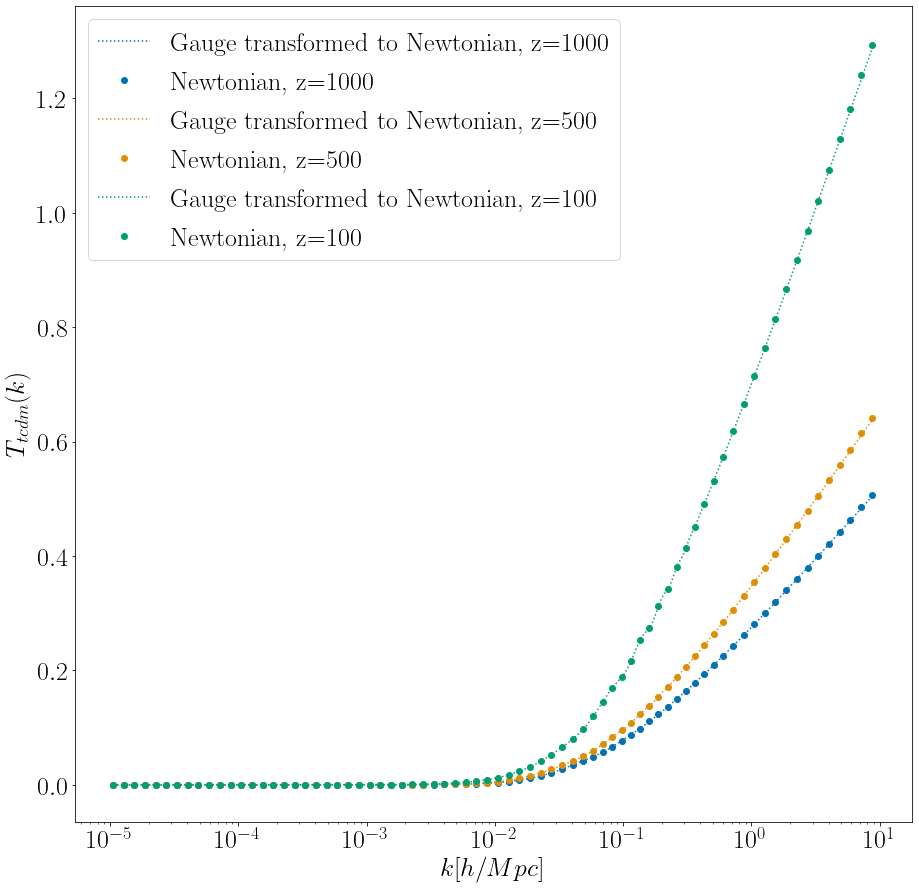

In [161]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,15))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    # Note that alpha is in 1/Mpc and also t_k in class is in 1/Mpc without h.
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    plt.plot(tk_sync[i][:,0], +alpha*k*k,":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::5,0], tk_new[i][::5,14],"o", color = Colors[l] , label = r"Newtonian, z="+str(z))
#     plt.plot(tk_sync[i][:,0], (0)**2,"-",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{tcdm}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
# plt.ylim(1.e-2,3.e-2)

### t_b

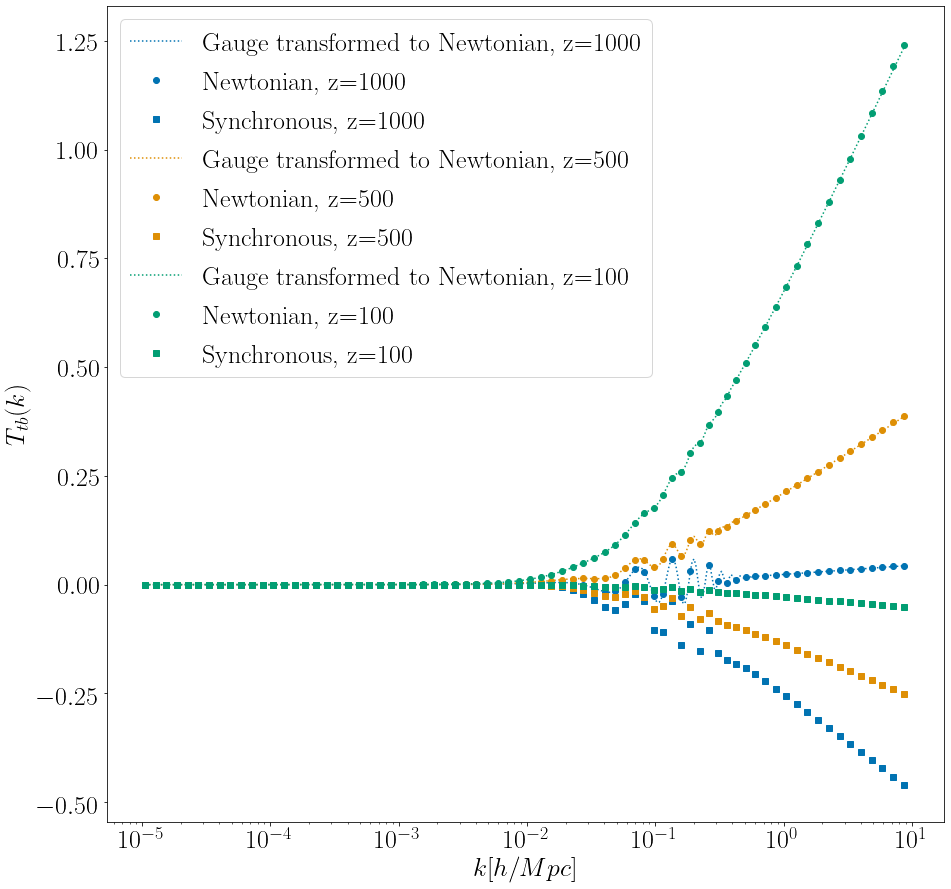

In [168]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,15))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    # Note that alpha is in 1/Mpc and also t_k in class is in 1/Mpc without h.
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,16]+alpha*k*k),":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::5,0], (tk_new[i][::5,13]),"o", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::5,0], (tk_sync[i][::5,16]),"s",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{tb}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
# plt.ylim(1.e-2,3.e-2)

### t_g

(-0.2, 0.2)

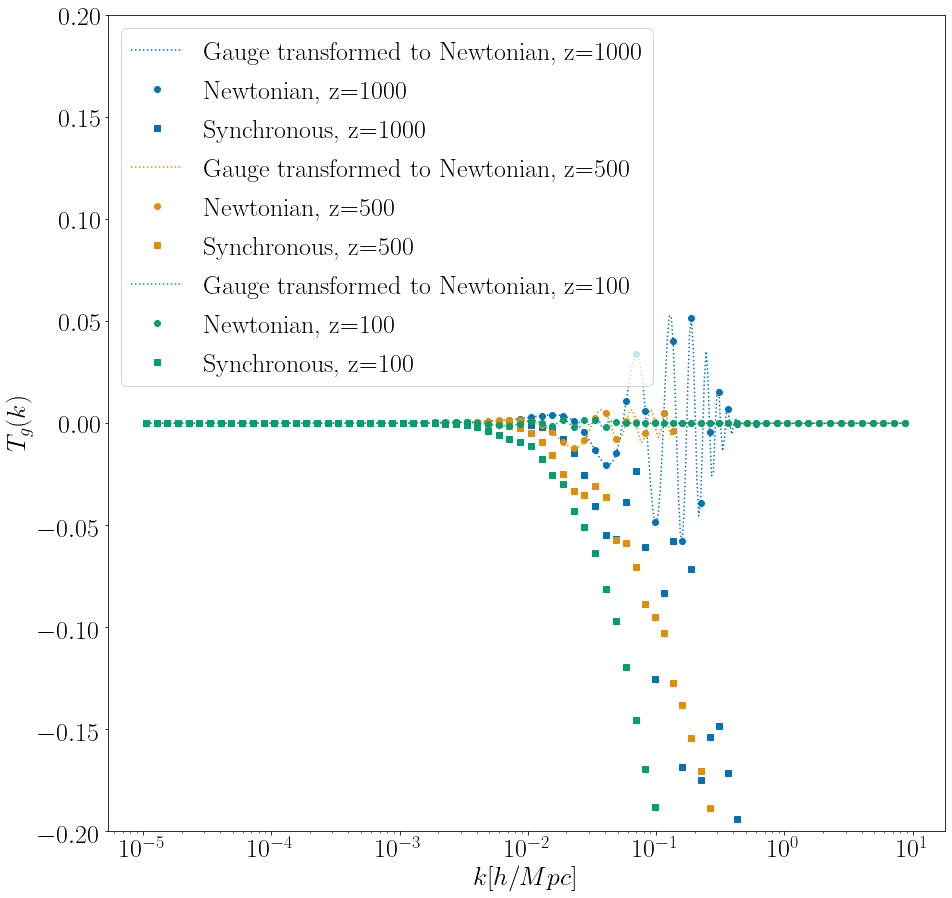

In [172]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,15))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,15]+alpha*k*k),":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::5,0], (tk_new[i][::5,12]),"o", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::5,0], (tk_sync[i][::5,15]),"s",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{g}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
plt.ylim(-0.2,0.2)



### t_fld

(-0.2, 0.2)

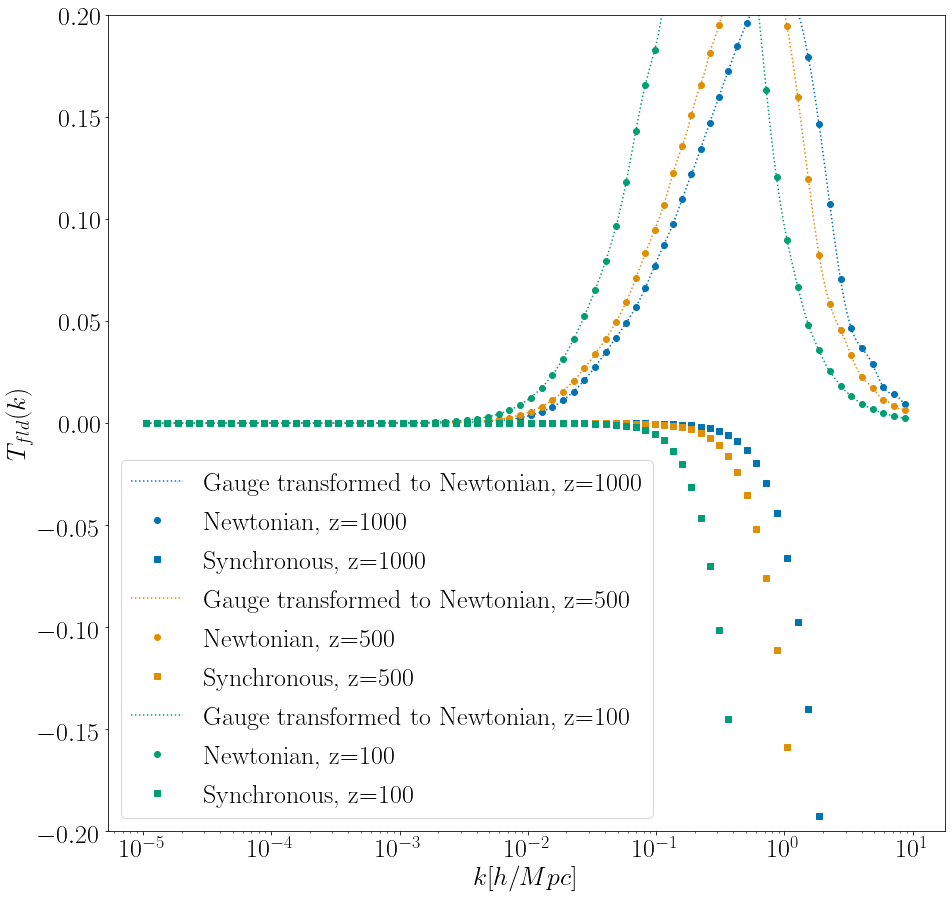

In [174]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,15))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,17]+alpha*k*k),":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::5,0], (tk_new[i][::5,15]),"o", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::5,0], (tk_sync[i][::5,17]),"s",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{fld}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
plt.ylim(-0.2,0.2)



### t_ur

(-0.2, 0.2)

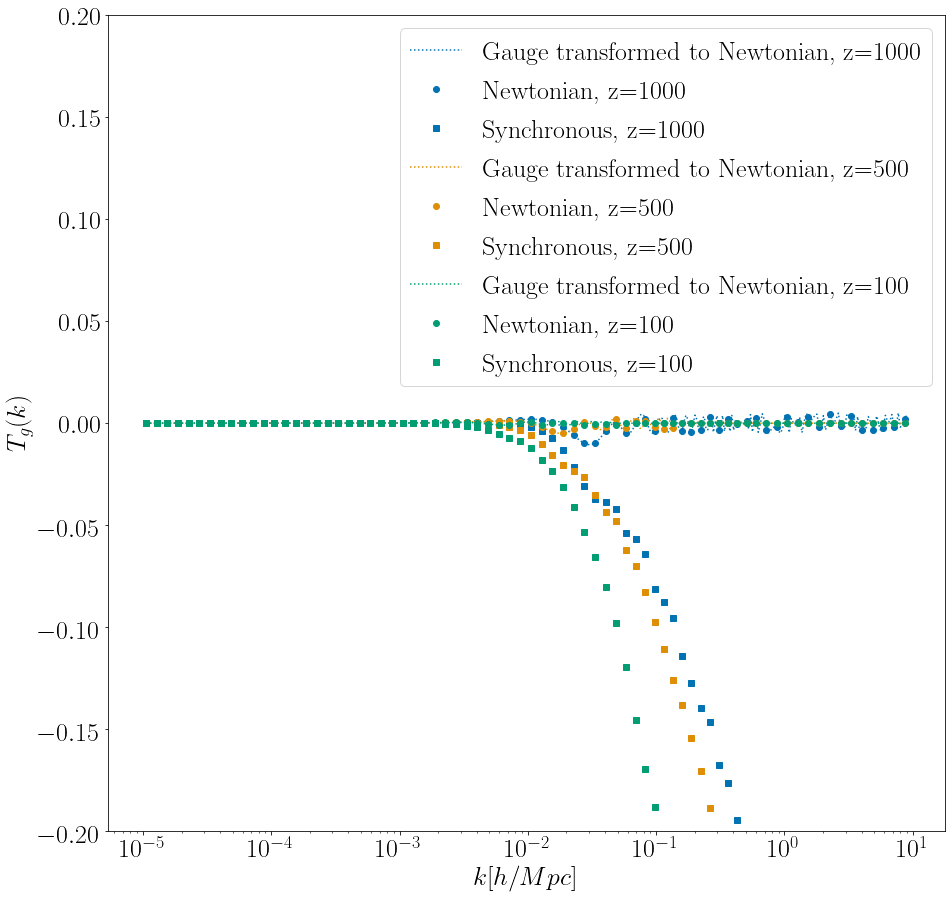

In [175]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,15))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,18]+alpha*k*k),":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::5,0], (tk_new[i][::5,16]),"o", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::5,0], (tk_sync[i][::5,18]),"s",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{g}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
plt.ylim(-0.2,0.2)



### t_tot

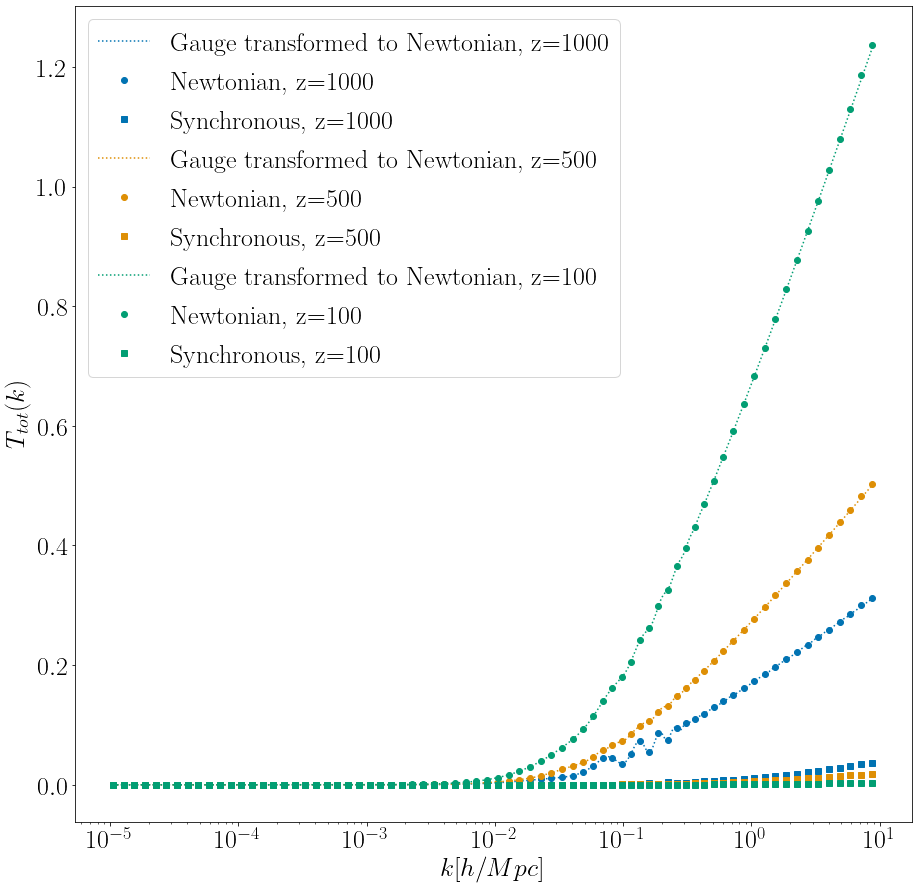

In [178]:
plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)

plt.figure(figsize=(15,15))

l=0
for i in range(0,3):
    z= redshifts[i];

    k= tk_sync[i][:,0]
    h_prime=tk_sync[i][:,10]
    eta_prime = tk_sync[i][:,12]
    psi = tk_sync[i][:,8]
    phi = tk_sync[i][:,7]
    eta = tk_sync[i][:,11]
    alpha = (h_prime + 6.*eta_prime)/(2.*k*k);
    alpha_prime = psi + phi - eta;
    plt.plot(tk_sync[i][:,0], (tk_sync[i][:,19]+alpha*k*k),":",color = Colors[l],label = r"Gauge transformed to Newtonian, z="+str(z))

    plt.plot(tk_new[i][::5,0], (tk_new[i][::5,17]),"o", color = Colors[l] , label = r"Newtonian, z="+str(z))
    plt.plot(tk_sync[i][::5,0], (tk_sync[i][::5,19])**2,"s",color = Colors[l],label = r"Synchronous, z="+str(z))
    l=l+1
plt.legend()
plt.ylabel(r"$T_{tot}(k)$")
plt.xlabel(r"$k[h/Mpc]$")
plt.xscale('log')
# plt.yscale('log')
# plt.xlim(1.e-5,1.e-3)
# plt.ylim(1.e-2,3.e-2)